<a href="https://colab.research.google.com/github/aaolcay/Autoencoders/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Author**
*The code was written by Abdullah Olcay (University of Southampton). If you want to copy or share the code, please refer to me!*

*The autoencoder architecture was constituted as similar to Valerio Velardo's work (you can access his YouTube channel on `https://www.youtube.com/@ValerioVelardoTheSoundofAI`). This is because of a need for detailed comparison of our model's output. The author highly recommends you to follow his lectures if you are interested in artificial intelligence on audio/sound.*



*For more information contact me:* 
*olcayazzam@gmail.com*

## **Load Data**
The data used in the autoencoder implementation is taken from `tensorflow`. That is `mnist` including images of numbers.

In [16]:
# Load Data
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_train = x_train[..., np.newaxis]
print(x_train.shape)

(60000, 28, 28, 1)


## **Autoencoders**
This python script contains an implementation of a basic autoencoders with convolutional layers `(conv2D)`. Autoencoders include three main stages:
1. **Encoder**: 4 layers with (conv2D + ReLU + BatchNormalization)
2. **Bottleneck**: Flatten + Dense
3. **Decoder**: 4 layers with conv2D + ReLU + BatchNormalization

Note: In this application, **Keras functional API** is used. 
Definition: The Keras functional API is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.

In [17]:
import tensorflow.keras as keras
import numpy as np
from keras import backend

In [18]:
# Load Data
# input_shape = (x_train.shape[1],x_train.shape[2])
input_shape = (x_train.shape[1],x_train.shape[2],1)

### **Encoder**

In [19]:
# 1. Encoder
encoder_input_layer = keras.layers.Input(shape=input_shape, name='encoder_input')
conv_layer_1 = keras.layers.Conv2D(filters=32, 
                                   kernel_size=(3,3),
                                   strides= (1,1),
                                   padding='same',
                                   name='encoder_conv_layer_1')
conv_layer_1 = conv_layer_1(encoder_input_layer)
conv_layer_1 = keras.layers.ReLU(name='encoder_relu_1')(conv_layer_1)
conv_layer_1 = keras.layers.BatchNormalization(name='encoder_bn_1')(conv_layer_1)

conv_layer_2 = keras.layers.Conv2D(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (2,2),
                                   padding='same',
                                   name='encoder_conv_layer_2') 
conv_layer_2 = conv_layer_2(conv_layer_1)
conv_layer_2 = keras.layers.ReLU(name='encoder_relu_2')(conv_layer_2)
conv_layer_2 = keras.layers.BatchNormalization(name='encoder_bn_2')(conv_layer_2)

conv_layer_3 = keras.layers.Conv2D(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (2,2),
                                   padding='same',
                                   name='encoder_conv_layer_3') 
conv_layer_3 = conv_layer_3(conv_layer_2)
conv_layer_3 = keras.layers.ReLU(name='encoder_relu_3')(conv_layer_3)
conv_layer_3 = keras.layers.BatchNormalization(name='encoder_bn_3')(conv_layer_3)

conv_layer_4 = keras.layers.Conv2D(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (1,1),
                                   padding='same',
                                   name='encoder_conv_layer_4') 
conv_layer_4 = conv_layer_4(conv_layer_3)
conv_layer_4 = keras.layers.ReLU(name='encoder_relu_4')(conv_layer_4)
conv_layer_4 = keras.layers.BatchNormalization(name='encoder_bn_4')(conv_layer_4)
model_encoder = conv_layer_4

### **Bottleneck**

In [20]:
# 2. Bottleneck
latent_space_dim = 2
bottleneck = keras.layers.Flatten()(model_encoder)
bottleneck = keras.layers.Dense(latent_space_dim, name='encoder_output')(bottleneck)

In [21]:
# Make this network a model
encoder = keras.Model(encoder_input_layer,bottleneck, name='encoder')
#encoder.summary()

### **Decoder**

In [22]:
from keras.engine import input_layer
# 3. Decoder

# The input, which is latent space (bottleneck), of decoder
decoder_input_layer = keras.layers.Input(shape=latent_space_dim, name='decoder_input')

# Build a dense layer as we need to mirror our encoder, this dense will hold all the output
# of encoder in 1D vector
shape_last_en = conv_layer_4.shape[1:] # take the shape of the latest layer in encoder: [7, 7, 64]
num_neurons = np.prod(shape_last_en) # 7 x 7 x 64 = 3136
decoder_dense_layer = keras.layers.Dense(num_neurons, name= 'decoder_dense_layer')(decoder_input_layer)

# Thus, dense layer flatten our output from the encoder, we need to reshape it
decoder_reshape_layer = keras.layers.Reshape(shape_last_en)(decoder_dense_layer)

# Decoder Convolutional Layers (Mirror of Encoder)
# Therefore, we also use convolutional transpose
dec_conv_layer_1 = keras.layers.Conv2DTranspose(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (1,1),
                                   padding='same',
                                   name='decoder_conv_layer_1')
dec_conv_layer_1 = dec_conv_layer_1(decoder_reshape_layer)
dec_conv_layer_1 = keras.layers.ReLU(name='decoder_relu_1')(dec_conv_layer_1)
dec_conv_layer_1 = keras.layers.BatchNormalization(name='decoder_bn_1')(dec_conv_layer_1)

dec_conv_layer_2 = keras.layers.Conv2DTranspose(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (2,2),
                                   padding='same',
                                   name='decoder_conv_layer_2') 
dec_conv_layer_2 = dec_conv_layer_2(dec_conv_layer_1)
dec_conv_layer_2 = keras.layers.ReLU(name='decoder_relu_2')(dec_conv_layer_2)
dec_conv_layer_2 = keras.layers.BatchNormalization(name='decoder_bn_2')(dec_conv_layer_2)

dec_conv_layer_3 = keras.layers.Conv2DTranspose(filters=64, 
                                   kernel_size=(3,3),
                                   strides= (2,2),
                                   padding='same',
                                   name='decoder_conv_layer_3') 
dec_conv_layer_3 = dec_conv_layer_3(dec_conv_layer_2)
dec_conv_layer_3 = keras.layers.ReLU(name='decoder_relu_3')(dec_conv_layer_3)
dec_conv_layer_3 = keras.layers.BatchNormalization(name='decoder_bn_3')(dec_conv_layer_3)

# Output layer of decoder (we had 4 convolutional layers in encoder, and so 
# the latest layer of decoder corresponds to the the fourth layer in encoder)
dec_conv_layer_4 = keras.layers.Conv2DTranspose(filters=1, # as images have 1 channel  
                                   kernel_size=(3,3),
                                   strides= (1,1),
                                   padding='same',
                                   name='decoder_conv_layer_4')
dec_conv_layer_4 = dec_conv_layer_4(dec_conv_layer_3)
decoder_output_layer = keras.layers.Activation('sigmoid', name="sigmoid_layer")(dec_conv_layer_4)

In [23]:
# Make this network a model
decoder = keras.Model(decoder_input_layer,decoder_output_layer, name='decoder')

### **Autoencoder (Combining encoder and decoder parts)**
To build autoencoder, we need to combine both encoder and decoder parts.

In [24]:
# Autoencoder
# autoencoder's input is the same as the input of encoder
autoencoder_input = encoder_input_layer
# autoencoder's output is the output of decoder that takes encoder with encoder input
autoencoder_output = decoder(encoder(encoder_input_layer))
autoencoder = keras.Model(autoencoder_input, autoencoder_output, name='autoencoder')

In [25]:
encoder.summary()
decoder.summary()
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder_conv_layer_1 (Conv2  (None, 28, 28, 32)       320       
 D)                                                              
                                                                 
 encoder_relu_1 (ReLU)       (None, 28, 28, 32)        0         
                                                                 
 encoder_bn_1 (BatchNormaliz  (None, 28, 28, 32)       128       
 ation)                                                          
                                                                 
 encoder_conv_layer_2 (Conv2  (None, 14, 14, 64)       18496     
 D)                                                              
                                                           

#### **Compile Autoencoder Model**
We chose `Adam` optimizer and `MeanSquaredError` as loss function

In [26]:
# Compile network (Adam optimizer with learning rate 0.0005)
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
mse_loss = keras.losses.MeanSquaredError()
autoencoder.compile(optimizer=optimizer, loss=mse_loss, metrics=['accuracy'])

#### **Train Autoencoder Model**
The data chose in directly taken from **Kaggle** `mnist` file that includes bunch of images.
The batch size was chosen, to mitigate possibility of overfitting, as 

In [32]:
# Train network
history = autoencoder.fit(x_train[:500], 
                  x_train[:500], # we expect to get the output as same as input
                  batch_size=32,
                  epochs=50)

Epoch 1/50
16/16 [==============================] - 3s 168ms/step - loss: 0.0344 - accuracy: 0.8071
Epoch 2/50
16/16 [==============================] - 3s 169ms/step - loss: 0.0331 - accuracy: 0.8070
Epoch 3/50
16/16 [==============================] - 3s 220ms/step - loss: 0.0327 - accuracy: 0.8075
Epoch 4/50
16/16 [==============================] - 3s 184ms/step - loss: 0.0335 - accuracy: 0.8075
Epoch 5/50
16/16 [==============================] - 3s 165ms/step - loss: 0.0331 - accuracy: 0.8062
Epoch 6/50
16/16 [==============================] - 3s 203ms/step - loss: 0.0329 - accuracy: 0.8076
Epoch 7/50
16/16 [==============================] - 5s 295ms/step - loss: 0.0332 - accuracy: 0.8072
Epoch 8/50
16/16 [==============================] - 4s 226ms/step - loss: 0.0340 - accuracy: 0.8067
Epoch 9/50
16/16 [==============================] - 3s 210ms/step - loss: 0.0334 - accuracy: 0.8070
Epoch 10/50
16/16 [==============================] - 5s 295ms/step - loss: 0.0326 - accuracy: 0.8066

In [33]:
# Summarize our network
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 2)                 99842     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         121537    
                                                                 
Total params: 221,379
Trainable params: 220,547
Non-trainable params: 832
_________________________________________________________________


Text(0, 0.5, 'Accuracy in Train Set')

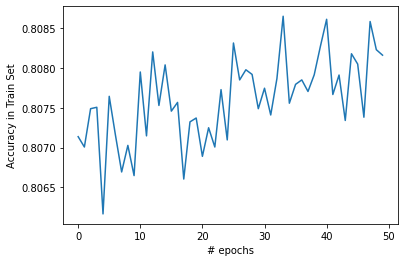

In [34]:
# Look at the history
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('Accuracy in Train Set')


Epoch 1/50
313/313 [==============================] - 57s 183ms/step - loss: 0.0473 - accuracy: 0.7948
Epoch 2/50
313/313 [==============================] - 58s 185ms/step - loss: 0.0452 - accuracy: 0.7960
Epoch 3/50
313/313 [==============================] - 57s 181ms/step - loss: 0.0445 - accuracy: 0.7964
Epoch 4/50
313/313 [==============================] - 56s 178ms/step - loss: 0.0438 - accuracy: 0.7967
Epoch 5/50
313/313 [==============================] - 56s 178ms/step - loss: 0.0436 - accuracy: 0.7968
Epoch 6/50
313/313 [==============================] - 56s 179ms/step - loss: 0.0432 - accuracy: 0.7969
Epoch 7/50
313/313 [==============================] - 56s 179ms/step - loss: 0.0427 - accuracy: 0.7971
Epoch 8/50
313/313 [==============================] - 56s 178ms/step - loss: 0.0424 - accuracy: 0.7972
Epoch 9/50
313/313 [==============================] - 57s 182ms/step - loss: 0.0423 - accuracy: 0.7972
Epoch 10/50
313/313 [==============================] - 56s 180ms/step - l

Text(0, 0.5, 'Accuracy in Train Set')

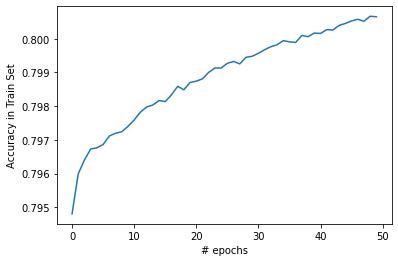

In [35]:
# Increase number of data to train so that we can avoid this fluctuating accuracy profile in the graph
history = autoencoder.fit(x_train[:10000], 
                  x_train[:10000], # we expect to get the output as same as input
                  batch_size=32,
                  epochs=50)
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('# epochs')
plt.ylabel('Accuracy in Train Set')